# Hypothesis testing problems

## Exercise 1

You are a nutritionist researching two different types of diets to see if there is a significant difference in weight loss after one month. You choose two random groups of people; one group follows the first diet, and the other follows the second. At the end of the month, you record the weight loss (in kg) for each person:

| Diet 1 | Diet 2 |
|:-------|:-------|
| 2.0 | 3.0 |
| 2.5 | 3.2 |
| 3.0 | 3.1 |
| 2.8 | 2.9 |
| 2.3 | 2.8 |
| 2.7 | 3.0 |
| 2.5 | 3.2 |

With these data, it seeks to answer the following question: Is there a significant difference in average weight loss between people who followed the first diet and those who followed the second diet?

To draw conclusions, follow the points below:

- State the hypothesis: null and alternative hypothesis.
- Perform the test to test the hypothesis. You can use a Student's t-test.
- Analyze the conclusions.

h0 -> no diet is better than the other one
h_a -> diet2 > diet1

In [26]:
import scipy.stats as stats

diet_1 = [2.0, 2.5, 3.0, 2.8, 2.3, 2.7, 2.5]
diet_2 = [3.0, 3.2, 3.1, 2.9, 2.8, 3.0, 3.2]

tval, pval = stats.ttest_ind(diet_1, diet_2)

print(f"{tval = }\n{pval = }")

tval = -3.5383407969933938
pval = 0.004083270191713912


Since pval <<<< 0.05, we can confirm that diet2 is better than diet1 for average weight loss.

## ANOVA

**ANOVA** (*Analysis of Variance*) is a statistical technique used to compare the measures of two or more groups. The idea behind ANOVA is to decompose the total variability in the data into two components: between-group variability and within-group variability:

- **Between-group variability**: This variability refers to the differences between the group means. If this variability is considerably larger than the within-group variability, it could be an indication that at least one of the group means is different.
- **Within-group variability**: This variability refers to the dispersion of the data within each group. If all groups have similar variability, then any noticeable difference in group means could be considered significant.

Hypotheses in ANOVA typically include:

- **Null hypothesis** ($H₀$): The means of all groups are equal.
- **Alternative hypothesis** ($H₁$): At least one of the group means is different.

If the ANOVA test result is significant (e.g., a p-value less than a threshold such as 0.05), this suggests that at least one group mean is different.

## Exercise 2

A farmer decides to test three different types of fertilizers to determine if one is superior in terms of corn production. The farmer plants corn on 15 identical plots and uses all three fertilizers (5 plots for each type). At the end of the season, he measures the corn yield (in kg) of each plot, with the following result:

| Fertilizer 1 | Fertilizer 2 | Fertilizer 3 |
|:-------------|:-------------|:-------------|
| 20 | 22 | 24 |
| 21 | 21 | 23 |
| 20 | 23 | 22 |
| 19 | 22 | 23 |
| 20 | 21 | 24 |

With this data, he seeks to answer the following question: Is there a significant difference in average corn yield between the three types of fertilizers?

To help you, follow the points below:

- State the hypothesis: null and alternative hypothesis.
- Perform the ANOVA test.
- Analyze the conclusions.
- If one fertilizer is better than another, how can we know it?

h0 -> 3 fertilizers are the same
ha -> at least one is different

In [24]:
f1 = [20, 21, 20 ,19, 20]
f2 = [22, 21, 23, 22, 21]
f3 = [24, 23, 22, 23, 24]

f_val, p_val = stats.f_oneway(f1,f2,f3)

print(f"{f_val = }\n{p_val = }")

f_val = 20.315789473684188
p_val = 0.00014047824793190475


Since pval <<<< 0.05, we can confirm that at least 1 fertilizer is better than the others

In [27]:
import numpy as np
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# We need to make the array 1d to be able to use the pairwise_turkeyhsd() method
# We're concatenating all the values and making a label for each
test = np.concatenate([f1,f2,f3])
labels = ["F1"]*len(f1) + ['F2']*len(f2) + ['F3']*len(f3)

# calculate all pairwise comparisons with TukeyHSD confidence intervals
# statsmodels.stats.multicomp.pairwise_tukeyhsd(endog, groups, alpha=0.05)
res = pairwise_tukeyhsd(test, labels)
print(res)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
    F1     F2      1.8 0.0099 0.4572 3.1428   True
    F1     F3      3.2 0.0001 1.8572 4.5428   True
    F2     F3      1.4 0.0409 0.0572 2.7428   True
--------------------------------------------------


In [13]:
#for i in range(len(labels)):
    #print(f"{labels[i]}: {test[i]}")

si es true -> hay diferencia -> meandiff marca cuanta diferencia hay -> si es positivo, group2>group1

f2>f1
f3>f1
f3>f2

f3>f2>f1

In [21]:
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Datos de rendimiento de maíz para cada fertilizante
fertilizante1 = [20, 21, 20, 19, 20]
fertilizante2 = [22, 21, 23, 22, 21]
fertilizante3 = [24, 23, 22, 23, 24]

# Organizar los datos en un DataFrame
data = {'Rendimiento': fertilizante1 + fertilizante2 + fertilizante3,'Fertilizante': ['Fertilizante 1'] * 5 + ['Fertilizante 2'] * 5 + ['Fertilizante 3'] * 5}

# Realizar ANOVA usando statsmodels
modelo = ols('Rendimiento ~ C(Fertilizante)', data=data).fit()
anova_table = sm.stats.anova_lm(modelo, typ=2)

print(anova_table)

                    sum_sq    df          F   PR(>F)
C(Fertilizante)  25.733333   2.0  20.315789  0.00014
Residual          7.600000  12.0        NaN      NaN


                    sum_sq    df          F   PR(>F)
C(Fertilizante)  25.733333   2.0  20.315789  0.00014
Residual          7.600000  12.0        NaN      NaN
Rechazamos la hipótesis nula. Hay una diferencia significativa en el rendimiento promedio del maíz entre los tres tipos de fertilizantes.



       Multiple Comparison of Means - Tukey HSD, FWER=0.05        
    group1         group2     meandiff p-adj  lower  upper  reject
------------------------------------------------------------------
Fertilizante 1 Fertilizante 2      1.8 0.0099 0.4572 3.1428   True
Fertilizante 1 Fertilizante 3      3.2 0.0001 1.8572 4.5428   True
Fertilizante 2 Fertilizante 3      1.4 0.0409 0.0572 2.7428   True
------------------------------------------------------------------


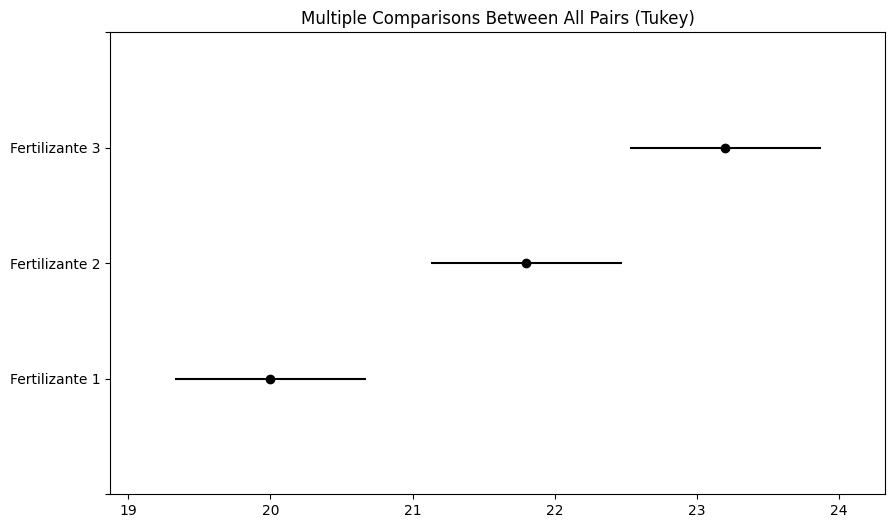

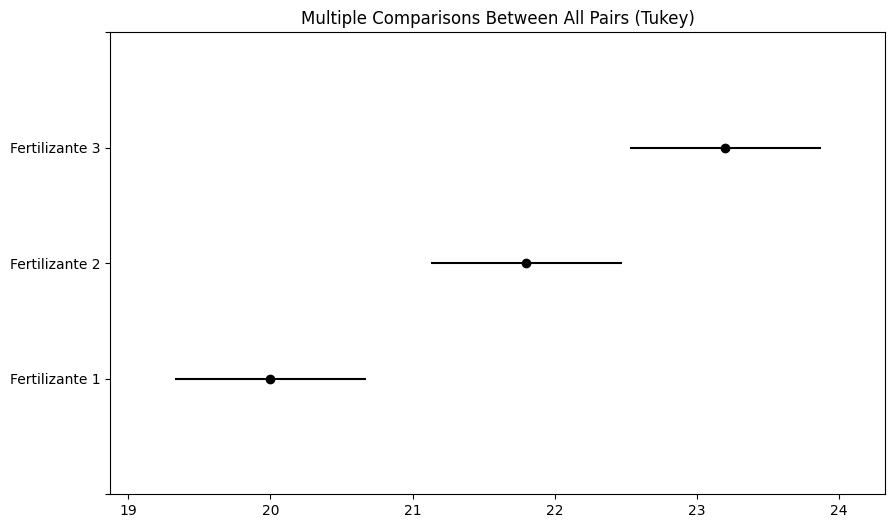

In [23]:
import numpy as np
from scipy import stats
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Datos de rendimiento de maíz para cada fertilizante
fertilizante1 = [20, 21, 20, 19, 20]
fertilizante2 = [22, 21, 23, 22, 21]
fertilizante3 = [24, 23, 22, 23, 24]

# Organizar los datos en un DataFrame
data = {'Rendimiento': fertilizante1 + fertilizante2 + fertilizante3,'Fertilizante': ['Fertilizante 1'] * 5 + ['Fertilizante 2'] * 5 + ['Fertilizante 3'] * 5}

df = pd.DataFrame(data)

# Realizar ANOVA usando statsmodels
modelo = ols('Rendimiento ~ C(Fertilizante)', data=df).fit()
anova_table = sm.stats.anova_lm(modelo, typ=2)

print(anova_table)

# Interpretar el P-value

alpha = 0.05  # Nivel de significancia
p_value = anova_table["PR(>F)"][0]

if p_value < alpha:
    print("Rechazamos la hipótesis nula. Hay una diferencia significativa en el rendimiento promedio del maíz entre los tres tipos de fertilizantes.")
else:
    print("No podemos rechazar la hipótesis nula. No hay una diferencia significativa en el rendimiento promedio del maíz entre los tres tipos de fertilizantes.")

print(f"\n\n")


# Identificar el mejor fertilizante

from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Realizar la prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Rendimiento'], groups=df['Fertilizante'], alpha=0.05)
print(tukey)

# Graficar los resultados de Tukey
tukey.plot_simultaneous()

In [31]:
import math

def student_t_test(s1, s2):
    
    x1 = sum(s1) / len(s1)
    x2 = sum(s2) / len(s2)
    
    n1 = len(s1)
    n2 = len(s2)
    
    s1_sq = sum((x - x1) ** 2 for x in s1) / (n1 - 1)
    s2_sq = sum((x - x2) ** 2 for x in s2) / (n2 - 1)
    
    sp = math.sqrt(((n1 - 1) * s1_sq + (n2 - 1) * s2_sq) / (n1 + n2 - 2))
    
    t_stat = (x1 - x2) / (sp * math.sqrt(1 / n1 + 1/ n2))
    
    df = n1 + n2 - 2
    
    return t_stat, df

diet_1 = [2.0, 2.5, 3.0, 2.8, 2.3, 2.7, 2.5]
diet_2 = [3.0, 3.2, 3.1, 2.9, 2.8, 3.0, 3.2]

t_stats, degree_freedom = student_t_test(diet_1, diet_2)

print(f"{t_stats = }")
print(f"{degree_freedom = }")

t_stats = -3.538340796993393
degree_freedom = 12
